<a href="https://colab.research.google.com/github/baranouskiart/reddit_sentiment/blob/main/reddit_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install praw 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 1.6 MB/s eta 0:00:00


In [3]:
# !pip install asyncpraw


In [4]:
# In a nutshell this secret key should not be visible due to the safety reasons, 
# but reddit approach to get API is very basic and my account info is not private.

import praw #will change to asynchronys version

user_agent = "Scraper 1.0 by /u/Any_Extension_2610"
reddit = praw.Reddit(
    client_id="QTNd9EfHR4xEstUGaT49kA",
    client_secret="2YVT0lSK-LGY73MkTDn5Z-0ybA8THQ",
    redirect_url='http://localhost:8080',
    user_agent=user_agent
)

In [5]:
# import asyncpraw

# reddit = asyncpraw.Reddit(
#     client_id="QTNd9EfHR4xEstUGaT49kA",
#     client_secret="2YVT0lSK-LGY73MkTDn5Z-0ybA8THQ",
#     user_agent="Comment Extraction (by u/Any_Extension_2610)",
#     username="Any_Extension_2610",
# )

In [6]:
posts_df = [] #creating the empty list to add the future data from Reddit

In [7]:
posts = reddit.subreddit("sysadmin+Entrepreneur+sales+productivity").top(time_filter="all", limit=10000)


# Introduction


*   The purpose of this project is to perform sentiment analysis on Reddit headlines and comments to identify the most popular CRM and ERP system alternatives.

*   The goal is to understand and visualize the impact of consumers desicion after search verification in the various project management systems abd tools using Reddit data.

*   This project is a junior classification task. So it's based on previous knowledge about reputation management I have, not copypasting the hole code.


In [8]:
# for submission in reddit.subreddit("sysadmin+Entrepreneur+sales+Notion").top(time_filter="all", limit=3000):
#   print(submission)

In [9]:
for post in posts:
    if "crm" in post.title.lower() or "erp" in post.title.lower() or "crm" in post.selftext.lower() or "erp" in post.selftext.lower():
        posts_df.append({
            'post_id' : post.id,
            'subreddit' : post.subreddit,
            'created_utc' : post.created_utc,
            'selftext' : post.selftext,
            'post_url' : post.url,
            'post_title': post.title,
            'link_flair_text' : post.link_flair_text,
            'score' : post.score,
            'num_comments' : post.num_comments,
            'upvote_ratio' : post.upvote_ratio
        })


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [10]:
posts_df = pd.DataFrame(posts_df)

## Methodology


*   The project will use sentiment analysis techniques to determine the overall sentiment of the comments and headlines related to various CRM and ERP systems and their alternatives.
*   The sentiment analysis will be performed using machine learning algorithms and libraries such as NLTK, Scikit-learn, and TextBlob.

* The project will also involve data cleaning and preprocessing to prepare the data for analysis.


In [11]:
posts_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio
0,7uf1yl,sysadmin,1.517448e+09,"I've been saying it, I've been saying it for 6...",https://www.reddit.com/r/sysadmin/comments/7uf...,"After 6 months of warning users, we finally di...",Windows,11212,2251,0.90
1,gi21b2,sysadmin,1.589250e+09,I was interviewing for a job as an Exchange ad...,https://www.reddit.com/r/sysadmin/comments/gi2...,What is the dumbest thing you've heard an empl...,None,10493,2265,0.96
2,fk5cq9,sysadmin,1.584452e+09,I'm seeing a lot of weeping and gnashing of te...,https://www.reddit.com/r/sysadmin/comments/fk5...,"This is what we do, people.",COVID-19,7978,1017,0.89
3,9rjn0z,sysadmin,1.540551e+09,Unlikely I know but every company I've ever wo...,https://www.reddit.com/r/sysadmin/comments/9rj...,Is it just me or is there a little part of you...,None,7772,788,0.95
4,eytom3,Entrepreneur,1.580838e+09,**TLDR -** Lil Nas X was a college dropout sle...,https://www.reddit.com/r/Entrepreneur/comments...,The marketing genius of Lil Nas X,Case Study,7456,489,0.98
...,...,...,...,...,...,...,...,...,...,...
249,vaj13w,sales,1.655029e+09,I work in enterprise software sales and I thin...,https://www.reddit.com/r/sales/comments/vaj13w...,Any other socially anxious people working in S...,Discussion,155,61,0.99
250,si15kk,sales,1.643738e+09,Do you say “I’m an enterprise account executiv...,https://www.reddit.com/r/sales/comments/si15kk...,"When someone asks you what you do, what do you...",Discussion,157,259,0.98
251,bx3zvj,sales,1.559749e+09,"Hey Reddit,\n\nFigured I would share this as t...",https://www.reddit.com/r/sales/comments/bx3zvj...,Little Tip from a SAAS Account Executive - Lif...,Resource,143,64,0.98
252,5uz4g1,sales,1.487523e+09,,http://imgur.com/a/1woL9,The /r/Sales Noob Starterpack,SHIT POST,145,37,0.96


In [12]:
# get the basic statistics of the score column
score_stats = posts_df['score'].describe()
# get the basic statistics of the comments column
comments_stats = posts_df['num_comments'].describe()

In [13]:
# print the statistics
print("Score statistics:")
print(score_stats)
print("Comments statistics:")
print(comments_stats)

Score statistics:
count      254.000000
mean      1150.657480
std       1481.767451
min        143.000000
25%        255.250000
50%        725.500000
75%       1500.500000
max      11212.000000
Name: score, dtype: float64
Comments statistics:
count     254.000000
mean      232.594488
std       272.515099
min        13.000000
25%        75.500000
50%       150.000000
75%       277.750000
max      2265.000000
Name: num_comments, dtype: float64


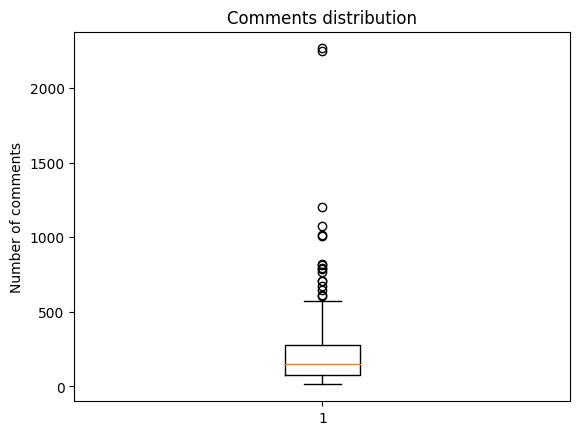

In [14]:
# create a boxplot of the comments column
plt.boxplot(posts_df['num_comments'])
plt.title('Comments distribution')
plt.ylabel('Number of comments')
plt.show()

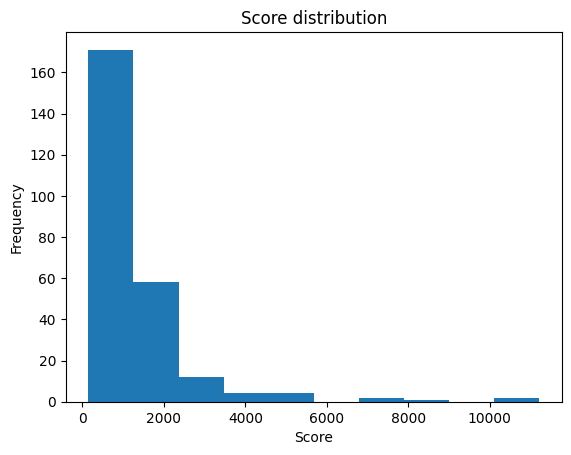

In [15]:
# create a histogram of the score column
plt.hist(posts_df['score'])
plt.title('Score distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [16]:
# count the number of occurrences of each subreddit and display the top 10
posts_df = pd.DataFrame(posts_df)
top_subreddits = posts_df['subreddit'].value_counts().head(10)
print(top_subreddits)

sales           94
Entrepreneur    82
sysadmin        66
productivity    12
Name: subreddit, dtype: int64


<Axes: xlabel='score', ylabel='num_comments'>

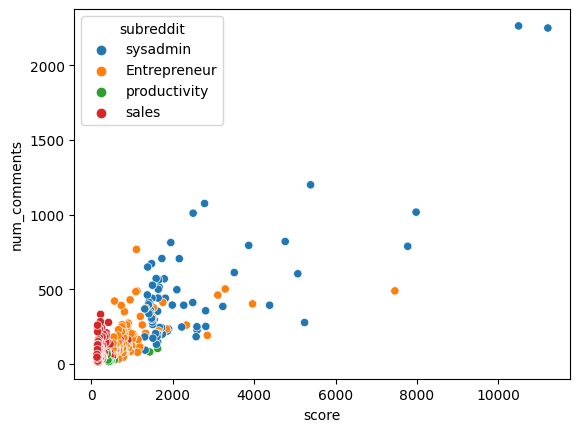

In [17]:
import seaborn as sns

sns.scatterplot(data=posts_df, x='score', y='num_comments', hue='subreddit')
#here we can understand that 'enterpreneur' is more rated categoty by keyword

Text(0.5, 1.0, 'Correlation between Post Attributes')

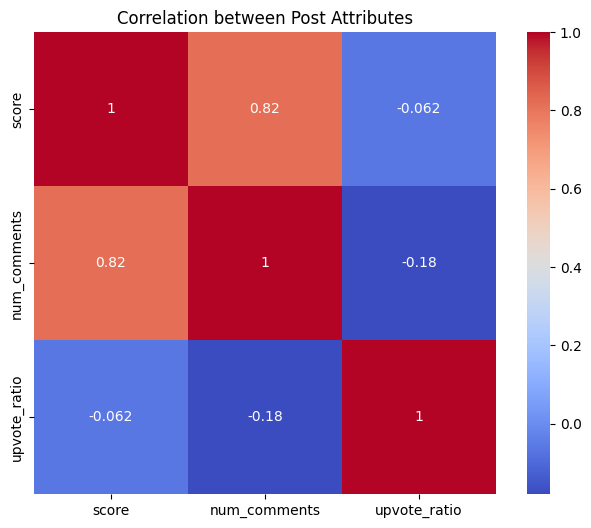

In [18]:
import matplotlib.pyplot as plt

corr = posts_df[['score', 'num_comments', 'upvote_ratio']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='coolwarm', annot=True, square=True)
plt.title('Correlation between Post Attributes')


In [19]:
subreddit_stats = posts_df.astype({'subreddit': 'str'}).groupby('subreddit')[['score', 'num_comments', 'upvote_ratio']].mean().reset_index()


In [20]:
subreddit_stats #we can change alternatives to another subreddit like Enterpreneur or delete it as no valuable

,subreddit,score,num_comments,upvote_ratio
0,Entrepreneur,1101.560976,201.060976,0.938780
1,productivity,661.750000,52.583333,0.974167
2,sales,260.489362,102.553191,0.959468
3,sysadmin,2568.363636,489.712121,0.958485


## Get comments from post

In [21]:
submission = reddit.submission("eytom3") #data should be reclened for this type of keys 

submission.comments.replace_more(limit=None)
for comment in submission.comments.list():
  print(comment.body)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Did you know that he made old town road song shorter than a regular song? He didn't include the last chorus, so naturally listeners will replay the song and only listen to the first chorus before skipping. The genius part is that a "stream" doesn't count as a stream unless it was streamed over 30 seconds. Guess how long is the chorus? A little over 30. So he basically doubled his streaming listens by this loophole.
As a musician as well as an entrepreneur, this might be my favourite post I’ve ever read in this sub.
Brilliant write-up, really enjoyed reading. I guess the moral is to never give up and stay creative!
there's actually a thread he posted in r/hiphopheads where he was trying to promote the song way before it got popular.

EDIT: here it is https://www.reddit.com/r/hiphopheads/comments/a31blp/trapcountry_my_new_song_mixes_trap_and_country/?st=jtw67qih&sh=8c5d5c3e
Crazy story. One question though: How did he get Billy Ray on the track as a nobody? Or was the Billy Ray version a

In [ ]:
comments_list = []

for post_id in posts_df['post_id']:
  submission = reddit.submission(post_id)

  submission.comments.replace_more(limit=None)
  for comment in submission.comments.list():
    comments_list.append({'post_id': post_id, 'comment' : comment.body})

# creating a df
comments_df = pd.DataFrame(comments_list)
comments_df.to_csv('DS_comments_reddit.csv', header=True, index=False)

Streaming output truncated to the last 5000 lines.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.r

In [ ]:
comments_df

# Getting and classification Reddit data

In [ ]:
import datetime as dt
from transformers import pipeline

In [ ]:
posts_df = pd.read_csv() #add the csv name and coding
comments_df = pd.read_csv()

# Data Visualizations 

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as pltfrom 
%matplotlib inline

In [ ]:
posts_df['created_date'] = posts_df['created_utc'].apply(lambda x: dt.datetime.fromtimestamp(x))
posts_df['created_year'] = posts_df['created_date'].dt.year
posts_df